# Intensity Transformations

## Output value of a pixel depend only on the input value of that pixel. 

### Identity Transformation Codes Discussed in Class

#### 1.

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)

#Changing the value of each pixel
t = np.arange(0,256).astype(np.uint8)

#Transformation
g = t[f]

cv.namedWindow('Image',cv.WINDOW_NORMAL)
cv.imshow('Image',f)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

### 2.

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)

#Changing the value of each pixel
t = np.arange(255,-1,-1).astype(np.uint8)

#Transformation
#g = t[f]
g = cv.LUT(f,t)

cv.namedWindow('Image',cv.WINDOW_NORMAL)
cv.imshow('Image',f)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

* Getting the transform t is the task here.
* By finding t any iage an be manipulated. 

### 3.

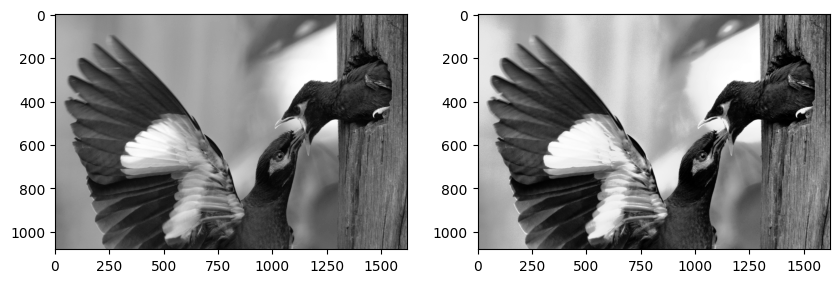

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

#method 1
h = cv.calcHist([im1],[0],None, [256],[0, 256])

#Method2
c = np.cumsum(h)
t = np.array([255*c[i]/c[255] for i in range(256)],dtype = np.uint8)

#im2 = cv.equalizeHist(f)
im2 = t[im1]

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(im1,cmap = 'gray')
plt.subplot(122)
plt.imshow(im2,cmap = 'gray')
plt.show()

## Identity Transformation Code

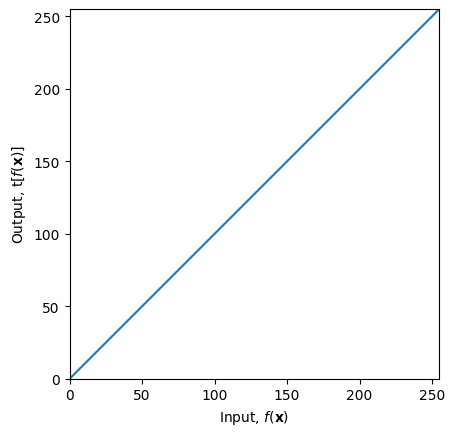

(1080, 1620)


In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

transform = np.arange(0,256).astype('uint8')

fig , ax = plt.subplots()

ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{t}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig,transform)

cv.imshow('Transformed_Identity', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

## Intensity Windowing

101
50
105
256


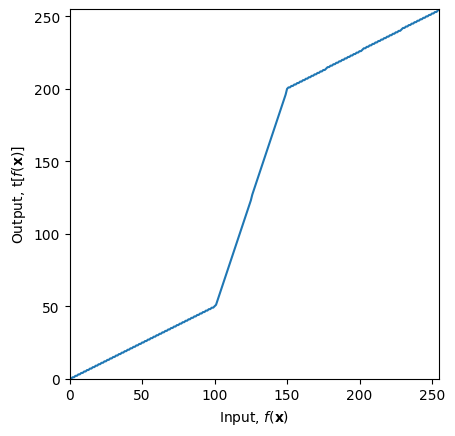

(1080, 1620)


In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(100,50),(150,200)])

t1 = np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, 255,255 - c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2),axis = 0).astype('uint8')
transform = np.concatenate((transform,t3),axis = 0).astype('uint8')

print(len(transform))

fig , ax = plt.subplots()

ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{t}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_orig = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig,transform)

cv.imshow('Transformed_Identity', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()


# Histograms

## Histograms Using OpenCV

### Histogram of a Grayscale Image

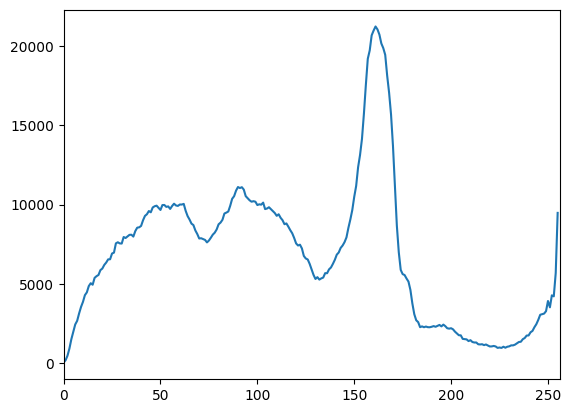

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)

hist = cv.calcHist([img],[0],None, [256],[0,256])

plt.plot(hist)
plt.xlim([0,256])
plt.show()


* cv.calcHist(): A function from OpenCV to calculate a histogram.

* [img]: The first argument is a list containing the image on which the histogram will be calculated.

* [0]: The second argument specifies which channel of the image to consider (in this case, grayscale, so channel 0).

* None: The third argument is a mask. If provided, it restricts the histogram calculation to the masked area. In this case, no mask is used.

* [256]: The fourth argument specifies the number of bins for the histogram (256 bins for 8-bit grayscale, covering intensity values from 0 to 255).

* [0, 256]: The fifth argument specifies the range of pixel values to consider for the histogram.


### Histogram of a Colour Image

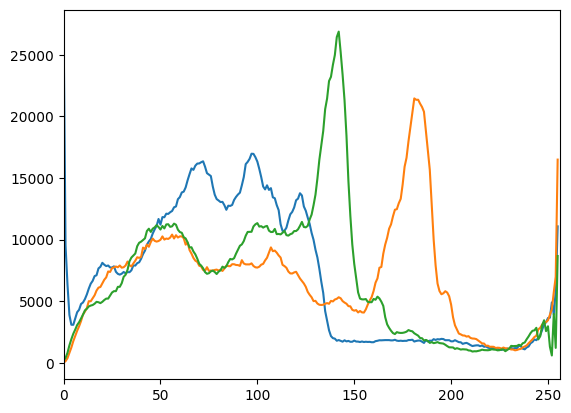

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_COLOR)

color = ('b','g','r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None, [256],[0,256])
    plt.plot(hist)
    plt.xlim([0,256])

plt.show()

* color: A tuple containing the characters 'b', 'g', and 'r', representing the color channels Blue, Green, and Red respectively.

* enumerate(color): This function pairs each color channel ('b', 'g', 'r') with its corresponding index (0, 1, 2) to loop over.

## Histogram Equalization

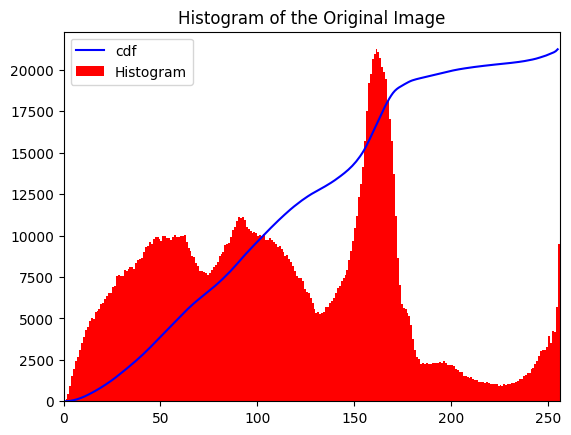

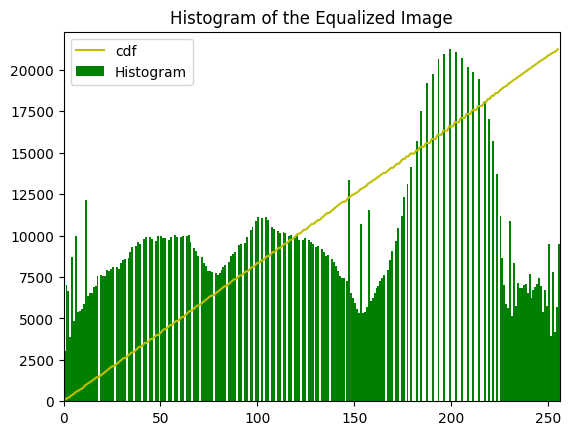

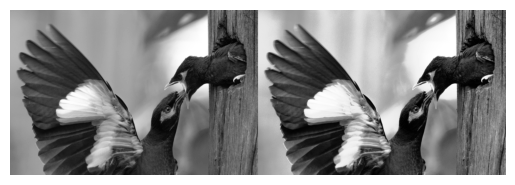

In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg',cv.IMREAD_GRAYSCALE)

hist , bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized,color = 'b')
plt.hist(img.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','Histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)
hist , bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized,color = 'y')
plt.hist(equ.flatten(),256,[0,256],color = 'g')
plt.xlim([0,256])
plt.legend(('cdf','Histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap = 'gray')



## Gamma Correction 

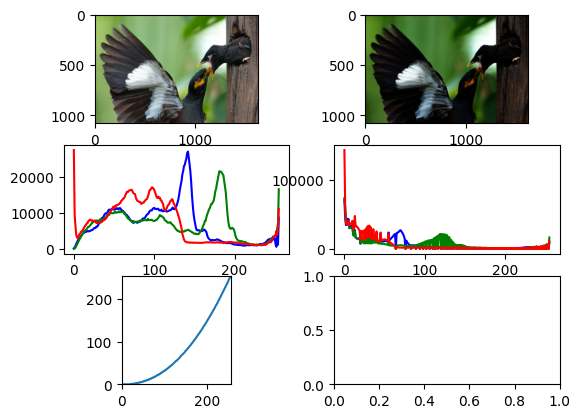

In [7]:
%matplotlib inline

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread ( 'C:/Python/ipmv/Scripts/Image_Processing_NoteBooks/Images/C.jpg' , cv.IMREAD_COLOR)

gamma = 2.2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

img_gamma = cv.LUT(img_orig, table)

img_orig = cv.cvtColor( img_orig , cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor( img_gamma , cv.COLOR_BGR2RGB)

f , axarr = plt.subplots ( 3 , 2 )

axarr [ 0 , 0 ] . imshow( img_orig )
axarr [ 0 , 1 ] . imshow( img_gamma)
color = ( 'b','g','r' )

for i , c in enumerate ( color ) :

    hist_orig = cv.calcHist( [ img_orig ] , [ i ] , None , [ 256] , [ 0 , 256] )
    axarr [ 1 , 0 ] . plot ( hist_orig , color = c )

    hist_gamma = cv.calcHist( [ img_gamma ] , [ i ] , None , [ 256] , [ 0 , 256 ] )
    axarr [ 1 , 1 ] . plot( hist_gamma , color = c )

axarr [ 2 , 0 ] . plot( table )
axarr [ 2 , 0 ] . set_xlim(0 ,255)
axarr [ 2 , 0 ] . set_ylim(0 ,255)
axarr [ 2 , 0 ] . set_aspect( 'equal' )